# Stock Forecasting

Time Series is a collection of data points collected at constant time intervals.
It is time dependent. 
Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading and Handling Time Series in Pandas

In [297]:
# load the raw data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [298]:
# identify the data type
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


# Time Series Data Structure
3 types of structures are used with TS data:
    - DatetimeIndex (mostly used)
    - PeriodIndex
    - TimedeltaIndex
Why do we need to convert the time into datetime while working with TS data?
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.

We will make it to the DatetimeIndex format and put it as the index column.
Because when the ‘date’ column is the index column we will be able to resample it very easily. 

In [299]:
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


# Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. 
If your date format is in DatetimeIndex, it is very easy:

In [300]:
apple['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [301]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [302]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [303]:
# dropping Close column, as we will use the Adjusted Close column for our model
apple = apple.drop('Close', axis=1)

In [304]:
apple = apple.rename(columns={"Adj Close": "Close"})

In [305]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900


In [306]:
# Call the .corr() method on the apple dataset to view the relationships among the features of the dataset
apple.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999920,0.999916,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.998961,-0.361110
Close,0.998900,0.999056,0.998961,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.360740,1.000000


# How to Check Stationarity of our TS data?

We can check stationarity using the following:
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

- Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

## Plotting Rolling Statistics:

In [307]:
rolmean = apple['Close'].rolling(window=12).mean()
rolstd = apple['Close'].rolling(window=12).std()
print(rolmean, rolstd)

Date
1996-01-02           NaN
1996-01-03           NaN
1996-01-04           NaN
1996-01-05           NaN
1996-01-08           NaN
                 ...    
2020-07-31    385.497500
2020-08-03    389.635834
2020-08-04    394.081668
2020-08-05    397.983335
2020-08-06    403.617500
Name: Close, Length: 6193, dtype: float64 Date
1996-01-02          NaN
1996-01-03          NaN
1996-01-04          NaN
1996-01-05          NaN
1996-01-08          NaN
                ...    
2020-07-31    14.446283
2020-08-03    20.483029
2020-08-04    24.794740
2020-08-05    28.140854
2020-08-06    32.405418
Name: Close, Length: 6193, dtype: float64


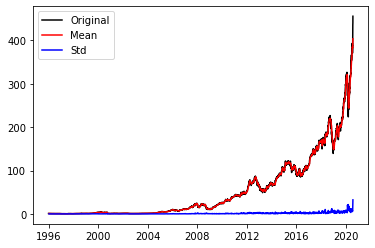

In [308]:
orig = plt.plot(apple['Close'], color='black', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

## Dickey-Fuller Test:

In [309]:
# checking the stationarity of the data by using adfuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest = adfuller(apple['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

Results of Dicky-Fuller Test:
Test Statistic                    5.150154
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    6158.000000
Critical Value(1%                -3.431412
Critical Value(5%                -2.862009
Critical Value(10%               -2.567020
dtype: float64


Null hypothesis in ADF test is that Data is not stationary. 
- if Test Statistic < Critical Values => Rejects the null hypothesis.
- if Test Statistic >Critical Values => failed to reject the null hypothesis.

From the results of Dickey-Fuller Test, the p-value is not less than 5%, so we can not reject the null hypothesis that the series is a random walk.
As we know that a random walk is a non-stationary series, our next step is to make the series stationary.

# Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is an exponential growth and significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. 
We can first take the differences and than take a log transform to bring the data close to stationarity.

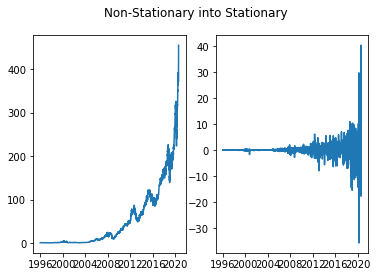

In [310]:
# Calculating and visualizing the difference
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Non-Stationary into Stationary')
# apple data as a non-stationary random walk
ax1.plot(apple['Close'])
# by computing the first differences, it becomes a stationary white noise process
ax2.plot(apple['Close'].diff())
plt.show()

So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

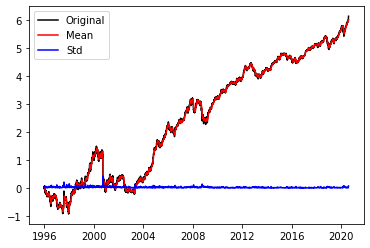

Results of Dicky-Fuller Test:
Test Statistic                    0.070866
p-value                           0.964015
#Lags Used                       22.000000
Number of Observations Used    6170.000000
Critical Value(1%                -3.431410
Critical Value(5%                -2.862009
Critical Value(10%               -2.567019
dtype: float64


In [311]:
# Taking the log
appleLogScale = np.log(apple['Close'])

# Smoothing the data
# Here we can take the average over the past 1 year, i.e. last 12 values.
moving_avg = appleLogScale.rolling(window = 12).mean()
movingSTD = appleLogScale.rolling(window=12).std()
orig = plt.plot(appleLogScale , color='black', label='Original')
mean = plt.plot(movingAVG, color='red', label='Mean')
std = plt.plot(movingSTD, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)


from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest = adfuller(appleLogScale, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

By taking only the log of the series we simply eliminate the exponatial growth. Applying the difference and the log at the same time, the transformed series looks stationary.

In [312]:
appleLogScaleMinusMA = appleLogScale - moving_avg
appleLogScaleMinusMA.dropna(inplace=True)

In [313]:
appleLogScaleMinusMA.head(12)

Date
1996-01-17    0.012254
1996-01-18   -0.049838
1996-01-19   -0.110546
1996-01-22   -0.086987
1996-01-23   -0.044121
1996-01-24   -0.018629
1996-01-25   -0.076034
1996-01-26   -0.054392
1996-01-29   -0.089298
1996-01-30   -0.135607
1996-01-31   -0.106621
1996-02-01   -0.063395
Name: Close, dtype: float64

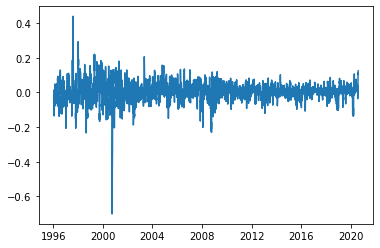

In [314]:
plt.plot(appleLogScaleMinusMA)
plt.show()

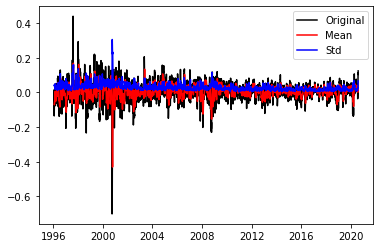

Results of Dicky-Fuller Test:
Test Statistic                -1.614457e+01
p-value                        4.637799e-29
#Lags Used                     1.700000e+01
Number of Observations Used    6.164000e+03
Critical Value(1%             -3.431411e+00
Critical Value(5%             -2.862009e+00
Critical Value(10%            -2.567020e+00
dtype: float64


In [315]:
test_stationarity(appleLogScaleMinusMA)

This looks like a much better series.
However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

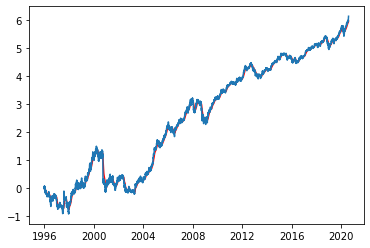

In [316]:
exponentialWeightedAVG = appleLogScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(exponentialWeightedAVG,  color='red')
plt.plot(appleLogScale)

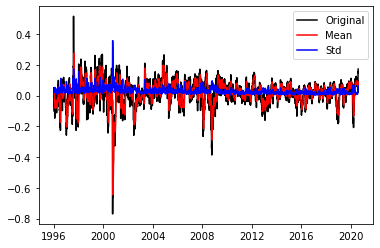

Results of Dicky-Fuller Test:
Test Statistic                -9.936328e+00
p-value                        2.737526e-17
#Lags Used                     2.200000e+01
Number of Observations Used    6.170000e+03
Critical Value(1%             -3.431410e+00
Critical Value(5%             -2.862009e+00
Critical Value(10%            -2.567019e+00
dtype: float64


In [317]:
appleLogScaleMinusMovingEWA = appleLogScale - exponentialWeightedAVG
test_stationarity(appleLogScaleMinusMovingEWA)

# Eliminating Trend and Seasonality

- Differencing – taking the differece with a particular time lag.
    One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant.

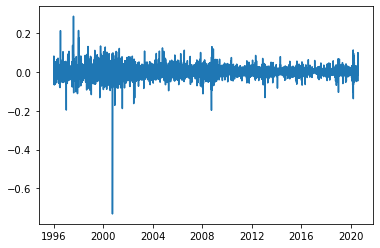

In [318]:
appleLogScaleShift_1 = appleLogScale - appleLogScale.shift()
plt.plot(appleLogScaleShift_1)

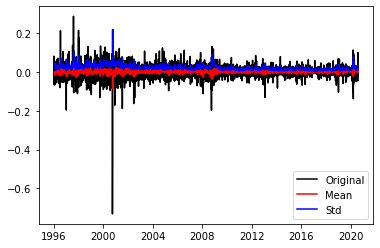

Results of Dicky-Fuller Test:
Test Statistic                -1.691884e+01
p-value                        9.976015e-30
#Lags Used                     2.100000e+01
Number of Observations Used    6.170000e+03
Critical Value(1%             -3.431410e+00
Critical Value(5%             -2.862009e+00
Critical Value(10%            -2.567019e+00
dtype: float64


In [319]:
appleLogScaleShift_1.dropna(inplace=True)
test_stationarity(appleLogScaleShift_1)

The results show that the test statistic is still bigger then the critical values, therefore we will take a second order difference to achieve a better result. 

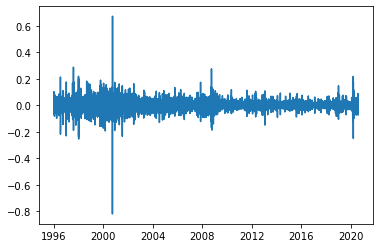

In [320]:
# second order difference
appleLogScaleShift_2 = appleLogScaleShift_1 - appleLogScaleShift_1.shift()
plt.plot(appleLogScaleShift_2)
plt.show()

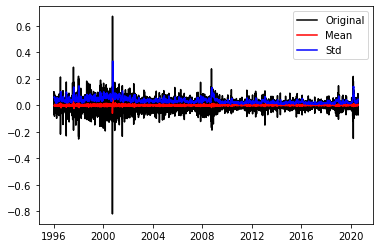

Results of Dicky-Fuller Test:
Test Statistic                  -22.898975
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    6156.000000
Critical Value(1%                -3.431413
Critical Value(5%                -2.862010
Critical Value(10%               -2.567020
dtype: float64


In [321]:
appleLogScaleShift_2.dropna(inplace=True)
test_stationarity(appleLogScaleShift_2)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is stationary. 

- Decomposition – modeling both trend and seasonality and removing them from the model.
This is another approach how to remove trend and seasonality and the remaining part of the series is returned. 

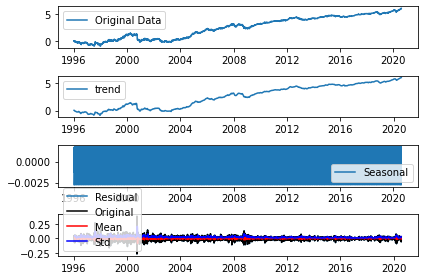

Results of Dicky-Fuller Test:
Test Statistic                  -21.524687
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    6146.000000
Critical Value(1%                -3.431414
Critical Value(5%                -2.862010
Critical Value(10%               -2.567020
dtype: float64


In [322]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(appleLogScale, freq=12)

trend =  decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(appleLogScale, label='Original Data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

# Plotting ACF and PACF

The next step is to determine the tuning parameters of the model by looking at the autocorrelation and partial autocorrelation graphs.

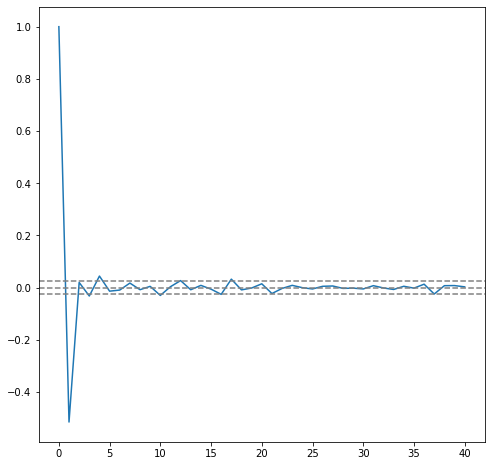

In [323]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf =acf(appleLogScaleShift_2)

plt.figure(figsize=(8, 8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(appleLogScaleShift_2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(appleLogScaleShift_2)),linestyle='--',color='gray')
#plt.title('Autocorrelation Function')
plt.show()

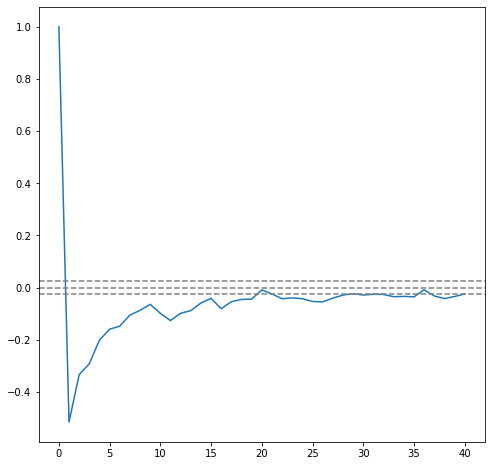

In [324]:
lag_pacf = pacf(appleLogScaleShift_2, method='ols')

#Plot PACF:
plt.figure(figsize=(8, 8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(appleLogScaleShift_2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(appleLogScaleShift_2)),linestyle='--',color='gray')
#plt.title('Partial Autocorrelation Function')
plt.show()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=.

# Feature engineering

## Moving Average Cross Strategy

In [325]:
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

def MovingAverage(df, start_date = '1996-01-02', end_date = '2020-08-06', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA'):
    '''
    The function takes the dataset, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
    
    #df['Close'] = df.loc[start_date:end_date,'Close'] # assign new colun name
    df.dropna(axis = 0, inplace = True) # remove any null rows 
    
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['Close'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['Close'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['Close'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['Close'].ewm(span = long_window, adjust = False).mean()

In [326]:
MovingAverage(apple)

In [327]:
apple 

,Open,High,Low,Close,Volume,20_SMA,50_SMA
Date,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600,0.993233,0.993233
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400,0.993233,0.993233
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600,0.987436,0.987436
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000,1.005310,1.005310
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200,1.018354,1.018354
...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198


# MACD - Moving Average Convergence Divergence

In [328]:
# MACD Calculation
def get_macd(df, slow=26, fast=12, smooth=9, start_date = '1996-01-02', end_date = '2020-08-06',):
    
    # isolate the closing price
    closingPrice = df.loc[start_date:end_date,'Close']
    
    exp1 = closingPrice.ewm(span = fast, adjust = False).mean()
    exp2 = closingPrice.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'MACD'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'MACD':'MACD_Signal'})
    hist = pd.DataFrame(macd['MACD'] - signal['MACD_Signal']).rename(columns = {0:'Hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

get_macd(apple)
# Drop the histogram column

,MACD,MACD_Signal,Hist
Date,,,
1996-01-02,0.000000,0.000000,0.000000
1996-01-03,0.000000,0.000000,0.000000
1996-01-04,-0.001387,-0.000277,-0.001110
1996-01-05,0.004170,0.000612,0.003558
1996-01-08,0.009401,0.002370,0.007031
...,...,...,...
2020-07-31,9.681217,9.116100,0.565117
2020-08-03,12.863593,9.865598,2.997994
2020-08-04,15.442450,10.980969,4.461481


In [329]:
apple= pd.concat([apple,get_macd(apple)], axis=1)

In [330]:
apple.drop(['Hist'], axis=1, inplace=True)

In [331]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal
Date,,,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600,0.993233,0.993233,0.000000,0.000000
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400,0.993233,0.993233,0.000000,0.000000
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600,0.987436,0.987436,-0.001387,-0.000277
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000,1.005310,1.005310,0.004170,0.000612
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200,1.018354,1.018354,0.009401,0.002370
...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969


# RSI 

In [332]:
# calculating RSI
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

apple['RSI_14'] = get_rsi(apple['Close'], 14)
apple = apple.dropna()
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14
Date,,,,,,,,,,
1996-01-09,1.236607,1.236607,1.169643,1.012557,62804000,1.017387,1.017387,0.008768,0.003650,53.407683
1996-01-10,1.160714,1.241071,1.151786,1.058933,91358400,1.023323,1.023323,0.011872,0.005294,64.800574
1996-01-11,1.165179,1.250000,1.156250,1.082122,189184800,1.030672,1.030672,0.016018,0.007439,68.896085
1996-01-12,1.241071,1.241071,1.187500,1.047339,100464000,1.032524,1.032524,0.016309,0.009213,57.995781
1996-01-15,1.205357,1.232143,1.191964,1.055069,90770400,1.034779,1.034779,0.016968,0.010764,59.528255
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993


In [333]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14
Date,,,,,,,,,,
1996-01-09,1.236607,1.236607,1.169643,1.012557,62804000,1.017387,1.017387,0.008768,0.003650,53.407683
1996-01-10,1.160714,1.241071,1.151786,1.058933,91358400,1.023323,1.023323,0.011872,0.005294,64.800574
1996-01-11,1.165179,1.250000,1.156250,1.082122,189184800,1.030672,1.030672,0.016018,0.007439,68.896085
1996-01-12,1.241071,1.241071,1.187500,1.047339,100464000,1.032524,1.032524,0.016309,0.009213,57.995781
1996-01-15,1.205357,1.232143,1.191964,1.055069,90770400,1.034779,1.034779,0.016968,0.010764,59.528255
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993


# Bollinger Band

In [334]:
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [335]:
apple['Upper_BB'], apple['Lower_BB'] = BollingerBand(apple['Close'], apple['20_SMA'], 20)

In [336]:
apple.dropna(inplace=True)

In [337]:
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,,,,
1996-02-05,1.060268,1.062500,1.035714,0.904344,79682400,0.968595,0.978547,-0.033569,-0.024182,41.942760,1.119905,0.817286
1996-02-06,1.044643,1.071429,1.044643,0.915939,56554400,0.963765,0.976139,-0.031474,-0.025641,43.975910,1.115333,0.812196
1996-02-07,1.062500,1.062500,0.991071,0.873427,90081600,0.954489,0.972335,-0.032865,-0.027086,38.633874,1.104230,0.804749
1996-02-08,0.982143,1.004464,0.982143,0.861833,65791600,0.943475,0.968388,-0.034506,-0.028570,37.302984,1.085915,0.801034
1996-02-09,0.995536,1.017857,0.986607,0.857968,51422000,0.934006,0.964581,-0.035706,-0.029997,36.847283,1.072498,0.795515
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361


In [338]:
apple.drop(['Open', 'High','Low'], axis=1, inplace=True)

In [339]:
apple

,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,
1996-02-05,0.904344,79682400,0.968595,0.978547,-0.033569,-0.024182,41.942760,1.119905,0.817286
1996-02-06,0.915939,56554400,0.963765,0.976139,-0.031474,-0.025641,43.975910,1.115333,0.812196
1996-02-07,0.873427,90081600,0.954489,0.972335,-0.032865,-0.027086,38.633874,1.104230,0.804749
1996-02-08,0.861833,65791600,0.943475,0.968388,-0.034506,-0.028570,37.302984,1.085915,0.801034
1996-02-09,0.857968,51422000,0.934006,0.964581,-0.035706,-0.029997,36.847283,1.072498,0.795515
...,...,...,...,...,...,...,...,...,...
2020-07-31,425.040009,93584200,384.080501,358.486799,9.681217,9.116100,73.800091,407.616522,360.544479
2020-08-03,435.750000,77037800,387.175501,360.864799,12.863593,9.865598,76.287956,419.635124,354.715877
2020-08-04,438.660004,43267900,390.474001,363.260198,15.442450,10.980969,76.928993,429.482641,351.465361


# Scaling and splitting the data

In [340]:
# Split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

X = apple.loc[:,apple.columns !=  'Close']
y = apple['Close']
train_X, test_X, train_y,test_y = train_test_split(X,y,test_size=0.25, random_state=42)

In [341]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(4626, 8) (4626,)
(1543, 8) (1543,)


# Build Model

In [342]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

# Make Predictions

In [343]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

Prediction Score :  0.9998241552765376
Mean Squared Error :  0.9660446914132951


In [344]:
# Order the data by the date
new_df=test_X.merge(test_y, left_index=True, right_index=True)

In [345]:
new_df['Predition'] = predict_y

In [346]:
new_df

,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB,Close,Predition
Date,,,,,,,,,,
2020-01-02,33870100,277.776030,264.783602,8.703356,7.341917,84.607849,298.506592,257.045468,298.829956,294.680977
1997-09-18,42291200,0.691302,0.641466,0.005116,0.011141,52.354449,0.731813,0.650790,0.689853,0.623448
2001-12-26,36600200,1.328691,1.234472,0.020057,0.029297,54.681260,1.440802,1.216580,1.328845,1.297000
2003-01-27,97851600,0.891205,0.920088,-0.013746,-0.011467,44.213979,0.935423,0.846986,0.873736,0.692858
2008-03-10,249897200,15.293720,17.811575,-0.643419,-0.805710,38.403972,16.126310,14.461129,14.802184,14.898773
...,...,...,...,...,...,...,...,...,...,...
2005-06-27,150042900,4.676435,4.605238,-0.001555,-0.004767,46.279578,4.995070,4.357800,4.588196,4.596443
2009-07-29,95539500,18.296021,17.470145,0.742026,0.590468,76.528459,20.528163,16.063878,19.791079,20.083051
2008-01-09,453470500,23.408334,22.602296,-0.039601,0.311993,43.751316,25.456911,21.359757,22.186584,21.370745


In [347]:
new_df.sort_index(inplace=True)

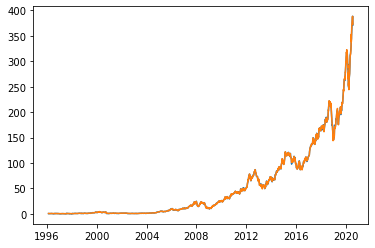

In [348]:
#Plot the predicted and the expected values as scatterplot
fig = plt.figure()
plt.plot(new_df.index,new_df['Predition'])
plt.plot(new_df.index,new_df['Close'])
plt.show()

# Random Forest

In [349]:
from sklearn.ensemble import RandomForestRegressor
# Labels are the values we want to predict
labels = np.array(apple['Close'])

# Remove the labels from the features
# axis 1 refers to the columns
features= apple.drop('Close', axis = 1)

# Saving feature names for later use
feature_list = list(apple.columns)

# Convert to numpy array
features = np.array(features)

In [350]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [351]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4626, 8)
Training Labels Shape: (4626,)
Testing Features Shape: (1543, 8)
Testing Labels Shape: (1543,)


In [352]:
"""
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

"""

"\n# The baseline predictions are the historical averages\nbaseline_preds = test_features[:, feature_list.index('average')]\n# Baseline errors, and display average baseline error\nbaseline_errors = abs(baseline_preds - test_labels)\nprint('Average baseline error: ', round(np.mean(baseline_errors), 2))\n\n"

In [353]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [354]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [355]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.42 degrees.


In [356]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.79 %.


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# SVM

# Gradient Boosted Trees

In [ ]:
# Optimizing
# pick the fav model and modify the hyper parameters